### Q5 Image Compression with Discrete Fourier Transform (DFT)

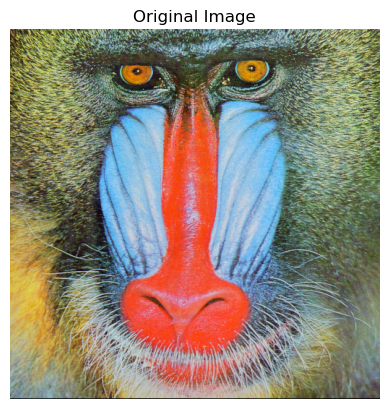

In [14]:
import numpy as np
import matplotlib.pyplot as plt

compression_ratio=[0.001,0.003,0.01,0.03]

#load image
img=plt.imread("baboon.png")

#display the original image
plt.figure()
plt.imshow(img)
plt.title("Original Image")
_=plt.axis("off")

Compression Ratio: 0.001, MSE: 0.0155
Compression Ratio: 0.003, MSE: 0.0131
Compression Ratio: 0.01, MSE: 0.0107
Compression Ratio: 0.03, MSE: 0.0082


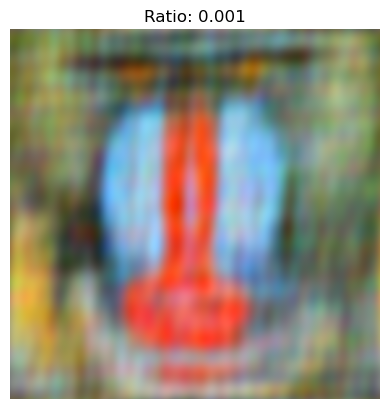

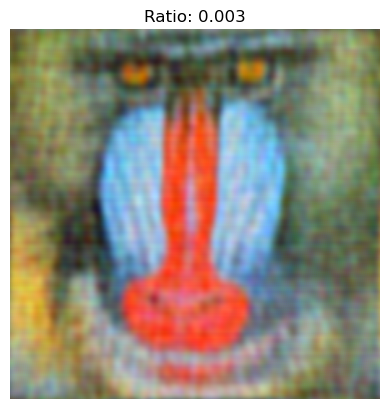

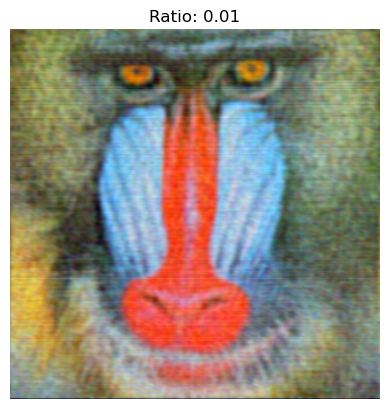

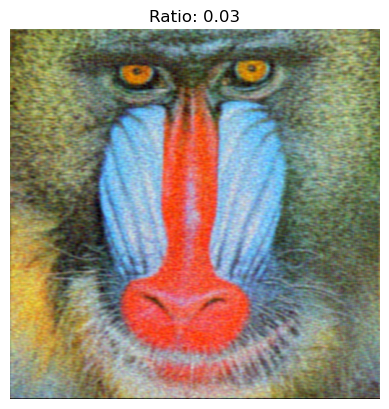

In [17]:
#Normalization
if img.max()>1:
    img=img/255.0

for ratio in compression_ratio:
    img_compressed=np.zeros_like(img)

    #apply to each of the channels
    for channel in range(img.shape[2]):
        #compute 2D DFT
        dft=np.fft.fft2(img[:,:,channel])
        #shift the zero frequency component to the center
        dft_shifted=np.fft.fftshift(dft)
        #calculate the magnitude spectrum
        magnitude_spectrum=np.abs(dft_shifted)
        #calculate the threshold
        threshold=np.percentile(magnitude_spectrum,100*(1-ratio))
        #select large coefficients
        dft_compressed=dft_shifted*(magnitude_spectrum>=threshold)
        #shift the zero frequency component back
        dft_inverse_shifted=np.fft.ifftshift(dft_compressed)
        #compute the inverse DFT
        channel_compressed=np.fft.ifft2(dft_inverse_shifted)
        #extract the real part
        img_compressed[:,:,channel]=np.real(channel_compressed)
    
    img_compressed=np.clip(img_compressed,0,1)

    #display the compressed image
    plt.figure()
    plt.imshow(img_compressed)
    plt.title(f"Ratio: {ratio}")
    plt.axis("off")

    #compute the mean squared error
    mse=np.mean((img-img_compressed)**2)
    print(f"Compression Ratio: {ratio}, MSE: {mse:.4f}")
